In [1]:
!pip install GitPython
!pip install torch-lr-finder
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.0-py3-none-any.whl size=38071 sha256=fbe85cb3307f9b81ec1f2fac6965d58aa65074b83b896c8a8f50d83d32c9ffe0
  Stored in directory: /root/.cache/pip/wheels/5b/e5/3d/8548241d5cffe53ad1476c566a61ad9bf09cc61a9430f09726
Successfully built grad-cam


In [2]:
from git import Repo
!rm -rf common
Repo.clone_from('https://github.com/kshitijqwerty/ERA_V2_common', "common")

<git.repo.base.Repo '/kaggle/working/common/.git'>

In [3]:
import torch

import torch.optim as optim
from torchvision import datasets
from torch import nn
import matplotlib.pyplot as plt
import numpy as np


from common.main import CustomDataset, TrainHelper
from common.utils import transform_cifar_A11, transform_cifar_test, max_lr_finder
from common.models.resnet import ResNet18
from torch.optim.lr_scheduler import OneCycleLR


# help draw the matplotlib plots
%matplotlib inline

In [4]:
if torch.backends.mps.is_available():
    # Apple Silicon GPU
    device = "mps"
    use_cuda = True
elif torch.cuda.is_available():
    # nVidia GPU
    device = "cuda"
    use_cuda = True
else:
    # CPU
    device = "cpu"

In [5]:
train = datasets.CIFAR10(root='./data', train=True, download=True, transform=False)
test = datasets.CIFAR10(root='./data', train=False, download=False, transform=False)


train_dataset = CustomDataset(train.data, train.targets, transform =transform_cifar_A11())
test_dataset = CustomDataset(test.data, test.targets, transform=transform_cifar_test())

train_loader = train_dataset.get_dataloader(batch_size=512, shuffle=True, use_cuda=use_cuda)
test_loader = test_dataset.get_dataloader(batch_size=512, shuffle=True, use_cuda=use_cuda)


Files already downloaded and verified


In [6]:


model = ResNet18()
model = model.to(device)



In [10]:


# # functions to show an image


# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()
# # 

# # get some random training images
# dataiter = iter(train_loader)
# images, labels = next(dataiter)
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# import torchvision
# # show images
# imshow(torchvision.utils.make_grid(images[:8]))
# # print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.22E-02


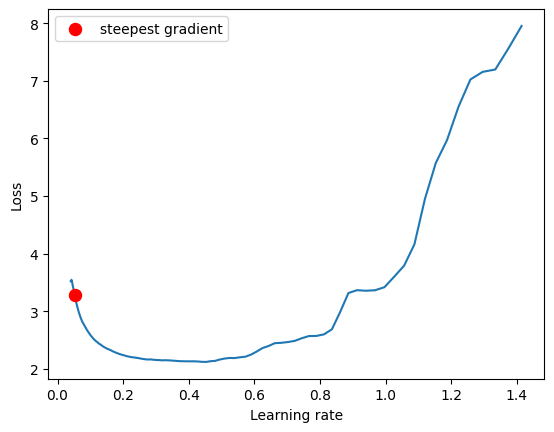

In [8]:


optimizer = optim.Adam(model.parameters(),  lr=0.03, weight_decay=1e-4)

criterion = nn.CrossEntropyLoss()
max_lr_finder(model, train_loader, optimizer, criterion, device)

EPOCH: 1


Loss=1.6536539793014526 Batch_id=97 Accuracy=35.22: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]



Test set: Average loss: 1.9802, Accuracy: 3803/10000 (38.03%)

EPOCH: 2


Loss=1.3489621877670288 Batch_id=97 Accuracy=45.26: 100%|██████████| 98/98 [00:37<00:00,  2.58it/s]



Test set: Average loss: 1.7799, Accuracy: 4048/10000 (40.48%)

EPOCH: 3


Loss=1.2362898588180542 Batch_id=97 Accuracy=53.67: 100%|██████████| 98/98 [00:38<00:00,  2.54it/s]



Test set: Average loss: 1.5735, Accuracy: 4913/10000 (49.13%)

EPOCH: 4


Loss=1.114510416984558 Batch_id=97 Accuracy=57.74: 100%|██████████| 98/98 [00:39<00:00,  2.48it/s] 



Test set: Average loss: 2.0725, Accuracy: 3981/10000 (39.81%)

EPOCH: 5


Loss=1.1302393674850464 Batch_id=97 Accuracy=58.54: 100%|██████████| 98/98 [00:39<00:00,  2.49it/s]



Test set: Average loss: 2.3014, Accuracy: 4275/10000 (42.75%)

EPOCH: 6


Loss=1.0519078969955444 Batch_id=97 Accuracy=60.78: 100%|██████████| 98/98 [00:39<00:00,  2.51it/s]



Test set: Average loss: 2.6190, Accuracy: 4467/10000 (44.67%)

EPOCH: 7


Loss=0.9852356910705566 Batch_id=97 Accuracy=62.65: 100%|██████████| 98/98 [00:38<00:00,  2.53it/s]



Test set: Average loss: 1.3559, Accuracy: 5800/10000 (58.00%)

EPOCH: 8


Loss=0.9914852976799011 Batch_id=97 Accuracy=64.77: 100%|██████████| 98/98 [00:38<00:00,  2.56it/s]



Test set: Average loss: 1.3364, Accuracy: 5567/10000 (55.67%)

EPOCH: 9


Loss=0.8988091349601746 Batch_id=97 Accuracy=66.41: 100%|██████████| 98/98 [00:38<00:00,  2.57it/s]



Test set: Average loss: 1.2529, Accuracy: 5868/10000 (58.68%)

EPOCH: 10


Loss=0.9209256172180176 Batch_id=97 Accuracy=67.76: 100%|██████████| 98/98 [00:38<00:00,  2.58it/s]



Test set: Average loss: 1.1761, Accuracy: 6017/10000 (60.17%)

EPOCH: 11


Loss=0.8671265840530396 Batch_id=97 Accuracy=69.12: 100%|██████████| 98/98 [00:38<00:00,  2.58it/s]



Test set: Average loss: 1.3618, Accuracy: 6059/10000 (60.59%)

EPOCH: 12


Loss=0.8362508416175842 Batch_id=97 Accuracy=69.97: 100%|██████████| 98/98 [00:37<00:00,  2.59it/s]



Test set: Average loss: 1.7911, Accuracy: 5110/10000 (51.10%)

EPOCH: 13


Loss=0.8892428874969482 Batch_id=97 Accuracy=70.70: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]



Test set: Average loss: 1.1569, Accuracy: 6218/10000 (62.18%)

EPOCH: 14


Loss=0.8717072010040283 Batch_id=97 Accuracy=72.45: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]



Test set: Average loss: 1.4644, Accuracy: 5835/10000 (58.35%)

EPOCH: 15


Loss=0.776984691619873 Batch_id=97 Accuracy=73.81: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s] 



Test set: Average loss: 0.9768, Accuracy: 7031/10000 (70.31%)

EPOCH: 16


Loss=0.6592527031898499 Batch_id=97 Accuracy=74.80: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]



Test set: Average loss: 0.7381, Accuracy: 7559/10000 (75.59%)

EPOCH: 17


Loss=0.6411083936691284 Batch_id=97 Accuracy=76.93: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]



Test set: Average loss: 0.6751, Accuracy: 7668/10000 (76.68%)

EPOCH: 18


Loss=0.5693685412406921 Batch_id=97 Accuracy=78.51: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]



Test set: Average loss: 0.6000, Accuracy: 7968/10000 (79.68%)

EPOCH: 19


Loss=0.5475093126296997 Batch_id=97 Accuracy=80.67: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s] 



Test set: Average loss: 0.4994, Accuracy: 8333/10000 (83.33%)

EPOCH: 20


Loss=0.45487767457962036 Batch_id=97 Accuracy=82.72: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]



Test set: Average loss: 0.4266, Accuracy: 8567/10000 (85.67%)



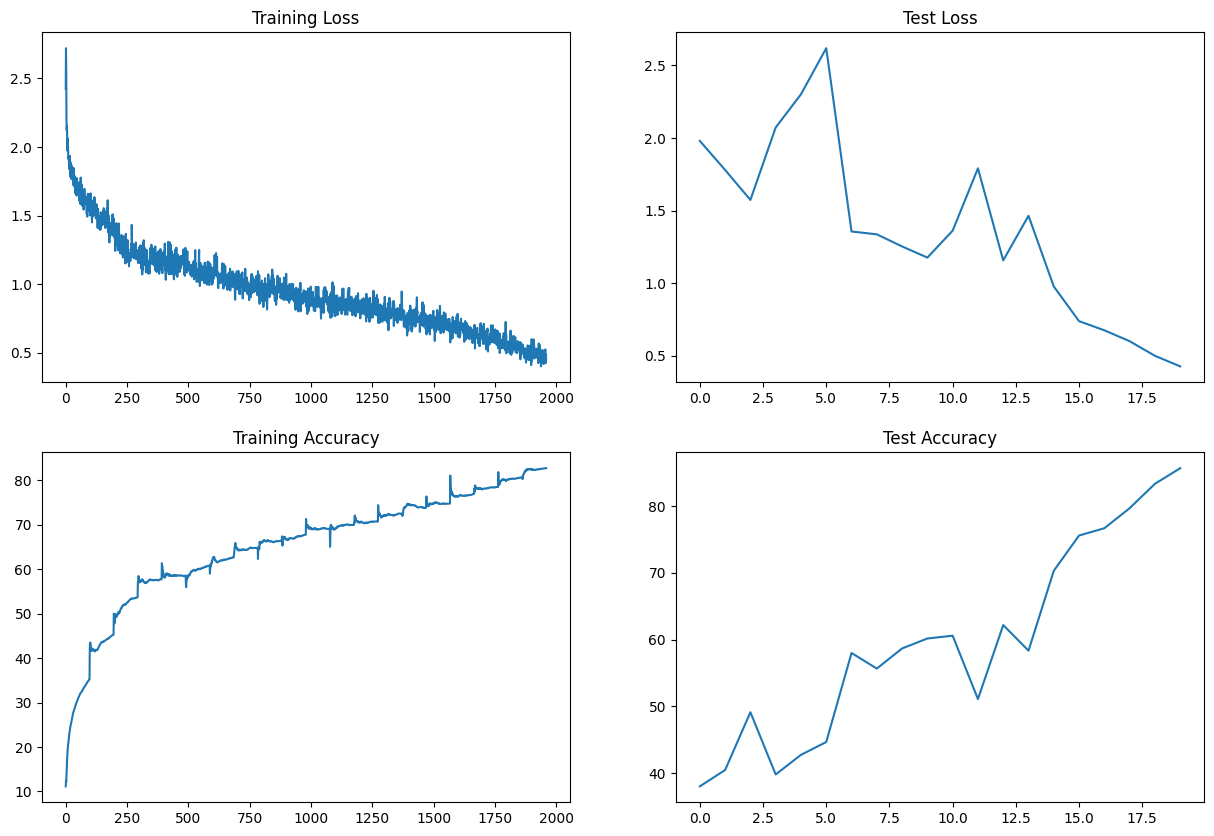

In [9]:


num_epochs = 20
peak_epoch = 5

scheduler = OneCycleLR(optimizer,
                       max_lr=5.22E-02,
                       total_steps=num_epochs * len(train_loader), 
                       epochs=num_epochs,
                       steps_per_epoch=len(train_loader),
                       div_factor=100,
                       three_phase=False,
                       final_div_factor=100,
                       pct_start=float(peak_epoch) / num_epochs,
                       anneal_strategy='linear')

helper = TrainHelper()
helper.train_for_epoch(model, device, train_loader, test_loader, optimizer, scheduler=scheduler, epoch=num_epochs, loss_fn='cross_entropy')

helper.plot()

In [10]:
model = model.to('cpu')
torch.save(model.state_dict(), "./model.pth")

In [13]:
def get_misclassified(model, test_loader):
    misclassified_images = []
    misclassified_labels = []
    correct_labels = []
    
    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True).squeeze()
            correct_mask = pred.eq(target.view_as(pred))
            misclassified_indices = ~correct_mask
            misclassified_data = data[misclassified_indices]
            misclassified_target = target[misclassified_indices]
            correct_target = target[correct_mask]
            
            misclassified_images.extend(misclassified_data.cpu().numpy())
            misclassified_labels.extend(misclassified_target.cpu().numpy())
            correct_labels.extend(correct_target.cpu().numpy())
            
            if len(misclassified_images) >= 10:
                break
    
    return misclassified_images, misclassified_labels, correct_labels

# Function to display images
def show_images(images, pred_labels, actual_labels, cols=5):
    rows = 2
    fig = plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        ax = fig.add_subplot(rows, cols, i +1)
        ax.imshow(np.transpose(images[i]/ 2 + 0.5 , (1, 2, 0)))
        ax.set_title(f'Actual: {classes[actual_labels[i]]}')
        ax.set_xlabel(f'Predicted: {classes[pred_labels[i]]}' )
#         ax.axis('off')
    plt.tight_layout()
    plt.show()

In [14]:
model = ResNet18()
model.load_state_dict(torch.load("./model.pth"))
model = model.to(device)

model.eval()
misclassified_images = []
misclassified_labels = []
correct_labels = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1)
#         print(output.argmax(dim=1), target)
        for i, (img, x,y) in enumerate(zip(data, pred, target)):
            if(x != y):
                misclassified_images.append(img.cpu())
                misclassified_labels.append(x.cpu())
                correct_labels.append(y.cpu())
            if len(misclassified_images) >= 10:
                break
                
            
        break


In [7]:
model = ResNet18()
model.load_state_dict(torch.load("./model.pth"))

model = model.to(device)
# misclassified_images,  v, correct_labels = get_misclassified(model, test_loader)
# show_images(misclassified_images[:10], misclassified_labels[:10], correct_labels[:10])





In [8]:
from common.utils import get_misclassified

mis_images, mis_labels, correct_labels = get_misclassified(model, device, test_loader)

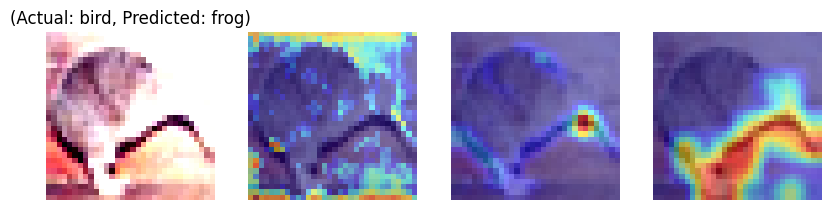

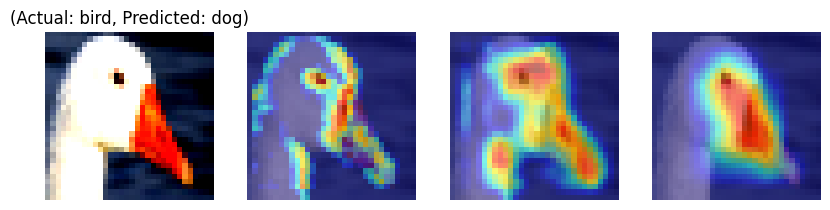

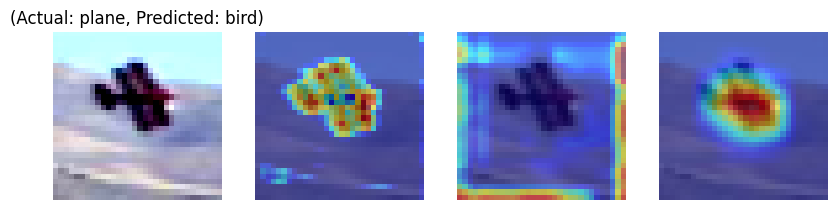

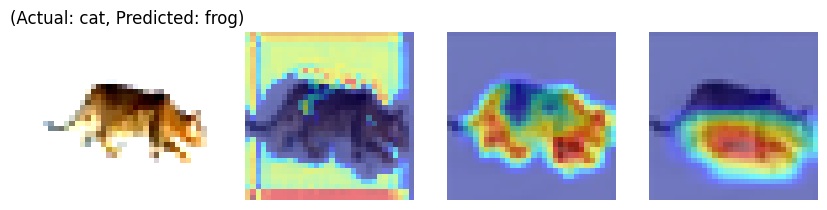

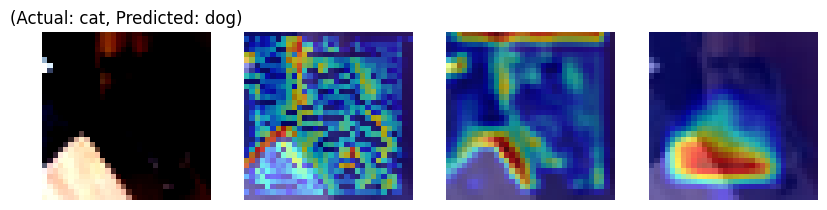

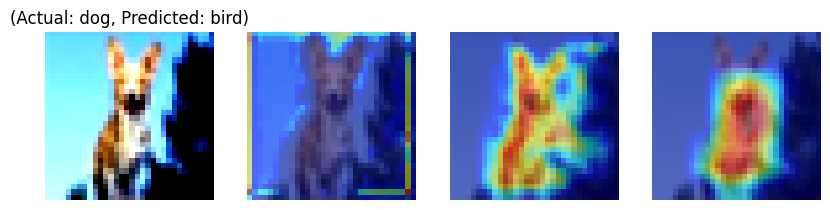

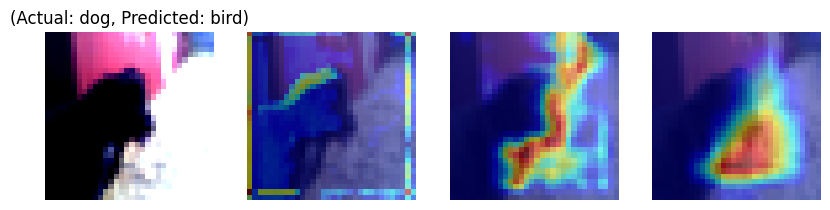

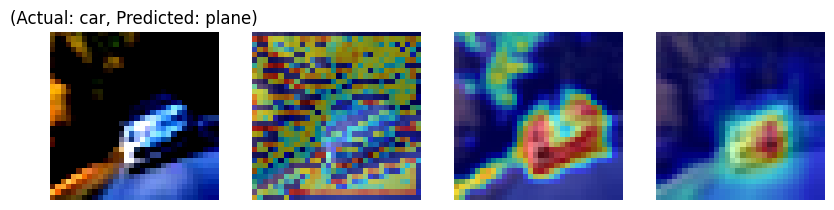

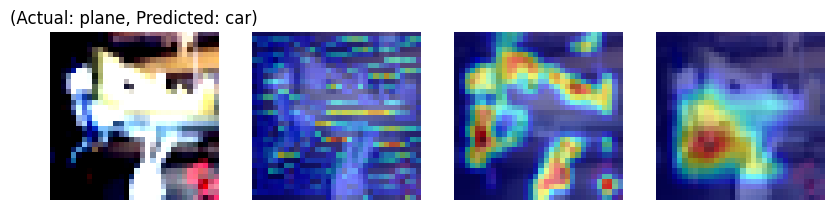

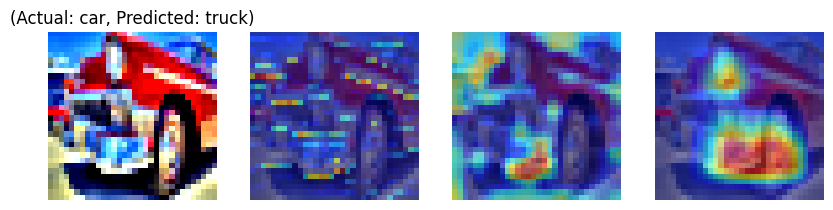

In [9]:
from common.utils import plot_gradcam

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

mis_labels = [classes[i] for i in mis_labels]
correct_labels = [classes[i] for i in correct_labels]
layers = [model.layer1[-1], model.layer2[-1], model.layer3[-1]]
plot_gradcam(model, device, mis_images, mis_labels, correct_labels, layers)